In [1]:
import re
import sys
from time import time, sleep
from pprint import pprint
from functools import partial
from multiprocessing import Pool

import numpy as np
import pandas as pd
import optuna
import matplotlib.pyplot as plt

FILENAME = "main.cpp"

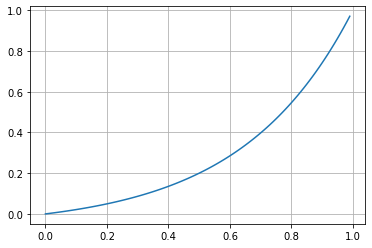

In [2]:
def f(x):
    h = 0.2
    a = (1.0 - 2.0 * h) / (h * h);
    return np.expm1(np.log1p(a) * x) / a;
x = np.arange(100.0) / 100.0
y = f(x)

plt.plot(x, y)
plt.grid()

In [3]:
!cp ../answer/main.cpp ./{FILENAME}

In [4]:
#!g++ {FILENAME} -std=gnu++17 -Wall -Wextra -O2 -DONLINE_JUDGE -o {FILENAME}.out
!g++ {FILENAME} -std=gnu++17 -Wall -Wextra -O2 -o {FILENAME}.out

main.cpp:49: warning: ignoring #pragma clang attribute [-Wunknown-pragmas]
   49 | #pragma clang attribute push (__attribute__((target("arch=skylake"))),apply_to=function)
      | 
main.cpp:1229: warning: ignoring #pragma clang attribute [-Wunknown-pragmas]
 1229 | #pragma clang attribute pop
      | 
main.cpp: In function ‘void Solve()’:
main.cpp:1138:72: warning: missing initializer for member ‘Solve()::Node::action’ [-Wmissing-field-initializers]
 1138 |   node_buffer.push({ state_buffer[0].score, nullptr, &state_buffer[0] });
      |                                                                        ^
main.cpp: In instantiation of ‘HashMap<T, size, KeyType>::HashMap() [with T = double; int size = 1048576; KeyType = long long unsigned int]’:
main.cpp:535:26:   required from here
main.cpp:477:30: warning: suggest parentheses around ‘-’ in operand of ‘&’ [-Wparentheses]
  477 |   static_assert((size & size - 1) == 0, "not pow of 2");
      |                         ~~~~~^~~
main.c

In [5]:
# テストケース生成
SEED = 1000
N_TESTCASES = 200

!mkdir in
for i in range(N_TESTCASES):
    filename = f"{i:04d}.txt"
    seed = SEED + i
    !python3 ../A/tester/generator.py {seed} > ./in/{filename}
!ls in

0000.txt  0025.txt  0050.txt  0075.txt	0100.txt  0125.txt  0150.txt  0175.txt
0001.txt  0026.txt  0051.txt  0076.txt	0101.txt  0126.txt  0151.txt  0176.txt
0002.txt  0027.txt  0052.txt  0077.txt	0102.txt  0127.txt  0152.txt  0177.txt
0003.txt  0028.txt  0053.txt  0078.txt	0103.txt  0128.txt  0153.txt  0178.txt
0004.txt  0029.txt  0054.txt  0079.txt	0104.txt  0129.txt  0154.txt  0179.txt
0005.txt  0030.txt  0055.txt  0080.txt	0105.txt  0130.txt  0155.txt  0180.txt
0006.txt  0031.txt  0056.txt  0081.txt	0106.txt  0131.txt  0156.txt  0181.txt
0007.txt  0032.txt  0057.txt  0082.txt	0107.txt  0132.txt  0157.txt  0182.txt
0008.txt  0033.txt  0058.txt  0083.txt	0108.txt  0133.txt  0158.txt  0183.txt
0009.txt  0034.txt  0059.txt  0084.txt	0109.txt  0134.txt  0159.txt  0184.txt
0010.txt  0035.txt  0060.txt  0085.txt	0110.txt  0135.txt  0160.txt  0185.txt
0011.txt  0036.txt  0061.txt  0086.txt	0111.txt  0136.txt  0161.txt  0186.txt
0012.txt  0037.txt  0062.txt  0087.txt	0112.txt  0137.txt  0162.

In [6]:
TESTCASE_DIRECTORY = "./in/"
TESTCASES = [f"{i:04d}.txt" for i in range(N_TESTCASES)]

In [7]:
# もとのスコアの確認

scores = []
times = []

!mkdir out

def parallel(i):
    testcase = TESTCASES[i]
    i = f"{i:04d}"
    t0 = time()
    !./{FILENAME}.out < {TESTCASE_DIRECTORY}{testcase} > ./out/{testcase} 2> /dev/null
    t = time() - t0
    score = !python3 ../A/tester/judge.py {TESTCASE_DIRECTORY}{testcase} ./out/{testcase}
    print(i, f"time:{t:.4f}", *score)
    score = int(score[0].split(":")[-1])
    return score, t

with Pool(4) as p:
    for score, t in p.map(parallel, range(N_TESTCASES)):
        scores.append(score)
        times.append(t)

np.mean(scores) * 50 / 1e6, np.std(scores) * 50 / 1e6

0000 time:4.0810 score:4021849
0013 time:4.2074 score:4236061
0026 time:4.4367 score:4240354
0039 time:4.4582 score:4440343
0014 time:3.8974 score:4529761
0040 time:3.7418 score:4075007
0001 time:4.2140 score:4424520
0027 time:3.8194 score:4788344
0028 time:3.9868 score:3845977
0041 time:4.1561 score:3678679
0002 time:4.0942 score:3960207
0015 time:4.4607 score:4910267
0016 time:3.7370 score:3446319
0042 time:4.3260 score:4441640
0029 time:4.4634 score:4337737
0003 time:4.3642 score:3923406
0017 time:4.1122 score:3759289
0004 time:4.2057 score:3876572
0043 time:4.3936 score:4157505
0030 time:4.8434 score:4156257
0018 time:4.1380 score:4128131
0005 time:4.4750 score:4279093
0031 time:3.8687 score:3912348
0044 time:4.4689 score:4539701
0019 time:3.9712 score:3809914
0045 time:3.3007 score:4024205
0006 time:3.7090 score:4278894
0032 time:3.6751 score:4800674
0020 time:3.7251 score:4080092
0007 time:3.6478 score:4496654
0033 time:3.6865 score:3382367
0046 time:4.3369 score:4163718
0021 tim

(207.935492, 17.186538030122183)

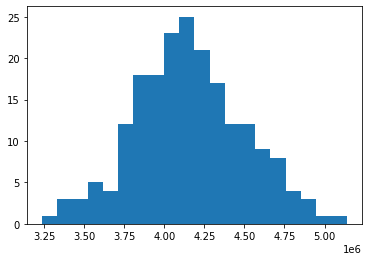

In [8]:
plt.hist(scores, bins=20)
plt.show()

In [9]:
# ここでエラー出力は何かおかしいかもしれない


# パラメータ抽出
with open(FILENAME) as f:
    answer = f.read()


variables_optimize = []

for left, value, right, options in re.findall(r"^([^/\n]*=\s*)(.+?)(\s*;\s*//(?:.*\W)?OPTIMIZE(\W.*))$", answer, re.MULTILINE):
    name = left.replace("=", "").strip().split()[-1]
    
    searched = re.search(r".*\[(?P<min>.*),(?P<max>.*)\].*", options)
    if searched:
        min_value = max_value = None
        try:
            min_value = eval(searched.group("min"))
            max_value = eval(searched.group("max"))
            assert min_value <= max_value
        except Exception as e:
            print(f"searched={searched}", file=sys.stderr)
            print(e, file=sys.stderr)
            continue
        log = "LOG" in options  # 雑、直したほうが良い
        if type(min_value) != type(max_value):
            print(f"searched={searched}", file=sys.stderr)
            print("types not matched", file=sys.stderr)
            continue
        if isinstance(min_value, int):
            method = "suggest_int"
        elif isinstance(min_value, float):
            method = "suggest_float"
        else:
            print(f"searched={searched}", file=sys.stderr)
            print(f"unknown type ({type(min_value)})", file=sys.stderr)
            continue
        variables_optimize.append({
            "name": name,
            "method": method,
            "min": min_value,
            "max": max_value,
            "log": log,
            "left": left,
            "right": right,
        })
    elif searched := re.search(r".*\{(?P<choices>.*?)\}.*", options):
        choices = list(map(lambda x: x.strip(), searched.group("choices").split(",")))
        variables_optimize.append({
            "name": name,
            "method": "suggest_categorical",
            "choices": choices,
            "left": left,
            "right": right,
        })
    else:
        print(f"searched={searched}", file=sys.stderr)
        print(f"pattern was matched but options are incorrect.", file=sys.stderr)

print(len(variables_optimize), "variables were found.")
if globals().get("pd"):
    display(pd.DataFrame(variables_optimize))
else:
    pprint(variables_optimize)

4 variables were found.


,name,method,min,max,log,left,right
0,K_START,suggest_float,0.020,0.100,True,constexpr double K_START =,"; // OPTIMIZE [0.02, 0.10] LOG"
1,K_END,suggest_float,0.005,0.040,True,constexpr double K_END =,"; // OPTIMIZE [0.005, 0.04] LOG"
2,K_H,suggest_float,0.001,0.999,False,constexpr double K_H =,"; // OPTIMIZE [0.001, 0.999]"
3,PURCHASE_TURN_LIMIT,suggest_int,750.000,900.000,False,constexpr short PURCHASE_TURN_LIMIT =,"; // OPTIMIZE [750, 900]"


In [23]:
def escape(string):  # 正規表現の中でそのまま使いたい文字列をエスケープ
    res = !echo '{string}' | sed -e 's/[]\/$*.^[]/\\&/g'
    return res[0]

def escape_sed(string):  # sed の置換後の文字列用のエスケープ
    res = !echo '{string}' | sed -e 's/[\/&]/\\&/g'
    return res[0]


def objective_with_index(trial, n_internal_parallel):
    index_parallel = trial.number % 12  # これ変数にする
    print(f"{index_parallel=}")
    
    parameters_changed_filename = f"{index_parallel}_{FILENAME}"
    #directory_input = "./in"  # "/" をつけない  # 中のすべてのファイルに対して実行される
    
    !mkdir {index_parallel}_out 2> /dev/null
    !mkdir {index_parallel}_score 2> /dev/null
    !rm {index_parallel}_out/*
    !rm {index_parallel}_score/*
    
    # ファイル作成
    !cp {FILENAME} {parameters_changed_filename}
    sed_options = [f"-i {parameters_changed_filename}"]
    for variable in variables_optimize:
        if variable["method"] == "suggest_categorical":
            val =  trial.suggest_categorical(variable["name"], variable["choices"])
        else:
            val = getattr(trial, variable["method"])(variable["name"], variable["min"], variable["max"], log=variable["log"])
        left = variable["left"]
        right = variable["right"]
        sed_options.append(f"""-e 's/^{escape(left)}.*{escape(right)}$/{escape_sed(left)}{val}{escape_sed(right)}/'""")
    command_sed = f"sed {' '.join(sed_options)}"
    print(command_sed)
    !{command_sed}
    
    # コンパイル
    command_compile = f"g++ {parameters_changed_filename} -std=gnu++17 -O2 -DONLINE_JUDGE -o {parameters_changed_filename}.out 2> /dev/null"
    print(command_compile)
    !{command_compile}
    
    # 実行・採点コマンド (@ はファイル名)
    command_exec = (
        f"./{parameters_changed_filename}.out < {TESTCASE_DIRECTORY}@ >./{index_parallel}_out/@ 2> /dev/null;"
        f"python3 ../A/tester/judge.py {TESTCASE_DIRECTORY}@ ./{index_parallel}_out/@ > ./{index_parallel}_score/@"
        
        #f"cargo run --release --manifest-path ../tools/Cargo.toml --bin tester {directory_input}/@ $(pwd)/{parameters_changed_filename}.out 2>&1 | grep Score | sed -E s/[^0-9]+// > ./{index_parallel}_score/@;"
        
        #f"./{parameters_changed_filename}.out < {directory_input}/@ > ./{index_parallel}_out/@;"
        #f"cargo run --release --manifest-path ./tools/Cargo.toml --bin vis {directory_input}/@ ./{index_parallel}_out/@ 2> /dev/null > ./{index_parallel}_score/@;"
    )
    
    # 並列実行 (sed はパスのディレクトリ部分を消してファイル名にしてる)
    !find {TESTCASE_DIRECTORY}/* | sed 's!^.*/!!' | xargs -I@ -P {n_internal_parallel} sh -c '{command_exec}'
    
    # 集計
    file_paths = !find ./{index_parallel}_score/*
    sum_score = 0
    for file_path in file_paths:  
        with open(file_path) as f:
            sum_score += int(f.read().split(":")[-1])
    return sum_score

In [24]:
storage_path = f"study.db"
storage = f"sqlite:///{storage_path}"
study_name = "study"
study = optuna.create_study(storage=storage, load_if_exists=True, study_name=study_name, direction="maximize")

def callback(study, trial):
    try:
        if study.best_value == trial.value:
            print(f"Updated! {study.best_value}")
            index_parallel = trial.number % 12
            parameters_changed_filename = f"{index_parallel}_{FILENAME}"
            !cp {parameters_changed_filename} 00000optimized.cpp
        print("callback ok")
    except:
        print(":(")

objective = partial(objective_with_index, n_internal_parallel=4)
study.optimize(objective, n_trials=3000, timeout=86400, n_jobs=1, callbacks=[callback])

[I 2021-09-09 17:08:26,316] A new study created in RDB with name: study


index_parallel=0
rm: cannot remove '0_out/*': No such file or directory
rm: cannot remove '0_score/*': No such file or directory
sed -i 0_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.032177631716066;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.02302686853859753;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.287423466823711;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 867;  \/\/ OPTIMIZE [750, 900]/'
g++ 0_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 0_main.cpp.out 2> /dev/null


[I 2021-09-09 17:11:56,584] Trial 0 finished with value: 800340513.0 and parameters: {'K_START': 0.032177631716066, 'K_END': 0.02302686853859753, 'K_H': 0.287423466823711, 'PURCHASE_TURN_LIMIT': 867}. Best is trial 0 with value: 800340513.0.


Updated! 800340513.0
callback ok
index_parallel=1
rm: cannot remove '1_out/*': No such file or directory
rm: cannot remove '1_score/*': No such file or directory
sed -i 1_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.03082165417956218;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.023767711155634186;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.05539430109778125;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 776;  \/\/ OPTIMIZE [750, 900]/'
g++ 1_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 1_main.cpp.out 2> /dev/null


[I 2021-09-09 17:15:07,743] Trial 1 finished with value: 780256858.0 and parameters: {'K_START': 0.03082165417956218, 'K_END': 0.023767711155634186, 'K_H': 0.05539430109778125, 'PURCHASE_TURN_LIMIT': 776}. Best is trial 0 with value: 800340513.0.


callback ok
index_parallel=2
rm: cannot remove '2_out/*': No such file or directory
rm: cannot remove '2_score/*': No such file or directory
sed -i 2_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.051604914635049404;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.018248817284584638;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3807211196569649;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 845;  \/\/ OPTIMIZE [750, 900]/'
g++ 2_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 2_main.cpp.out 2> /dev/null


[I 2021-09-09 17:18:33,756] Trial 2 finished with value: 813674925.0 and parameters: {'K_START': 0.051604914635049404, 'K_END': 0.018248817284584638, 'K_H': 0.3807211196569649, 'PURCHASE_TURN_LIMIT': 845}. Best is trial 2 with value: 813674925.0.


Updated! 813674925.0
callback ok
index_parallel=3
rm: cannot remove '3_out/*': No such file or directory
rm: cannot remove '3_score/*': No such file or directory
sed -i 3_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.022689917321407578;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.010232544224343068;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7370462090299498;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 877;  \/\/ OPTIMIZE [750, 900]/'
g++ 3_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 3_main.cpp.out 2> /dev/null


[I 2021-09-09 17:21:49,456] Trial 3 finished with value: 713540896.0 and parameters: {'K_START': 0.022689917321407578, 'K_END': 0.010232544224343068, 'K_H': 0.7370462090299498, 'PURCHASE_TURN_LIMIT': 877}. Best is trial 2 with value: 813674925.0.


callback ok
index_parallel=4
rm: cannot remove '4_out/*': No such file or directory
rm: cannot remove '4_score/*': No such file or directory
sed -i 4_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.03442350165152188;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.006225512482657232;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.9151258734646224;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 805;  \/\/ OPTIMIZE [750, 900]/'
g++ 4_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 4_main.cpp.out 2> /dev/null


[I 2021-09-09 17:24:44,401] Trial 4 finished with value: 617574983.0 and parameters: {'K_START': 0.03442350165152188, 'K_END': 0.006225512482657232, 'K_H': 0.9151258734646224, 'PURCHASE_TURN_LIMIT': 805}. Best is trial 2 with value: 813674925.0.


callback ok
index_parallel=5
rm: cannot remove '5_out/*': No such file or directory
rm: cannot remove '5_score/*': No such file or directory
sed -i 5_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.07859658858149964;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.024752304107930116;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.9226942158679697;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [750, 900]/'
g++ 5_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 5_main.cpp.out 2> /dev/null


[I 2021-09-09 17:28:05,571] Trial 5 finished with value: 812813787.0 and parameters: {'K_START': 0.07859658858149964, 'K_END': 0.024752304107930116, 'K_H': 0.9226942158679697, 'PURCHASE_TURN_LIMIT': 837}. Best is trial 2 with value: 813674925.0.


callback ok
index_parallel=6
rm: cannot remove '6_out/*': No such file or directory
rm: cannot remove '6_score/*': No such file or directory
sed -i 6_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.0966550768493991;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.011389205747358857;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2577144490193151;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 818;  \/\/ OPTIMIZE [750, 900]/'
g++ 6_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 6_main.cpp.out 2> /dev/null


[I 2021-09-09 17:30:58,193] Trial 6 finished with value: 295603403.0 and parameters: {'K_START': 0.0966550768493991, 'K_END': 0.011389205747358857, 'K_H': 0.2577144490193151, 'PURCHASE_TURN_LIMIT': 818}. Best is trial 2 with value: 813674925.0.


callback ok
index_parallel=7
rm: cannot remove '7_out/*': No such file or directory
rm: cannot remove '7_score/*': No such file or directory
sed -i 7_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.029122106180053713;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.013688769076881867;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7497560231676862;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 811;  \/\/ OPTIMIZE [750, 900]/'
g++ 7_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 7_main.cpp.out 2> /dev/null


[I 2021-09-09 17:34:09,795] Trial 7 finished with value: 737955313.0 and parameters: {'K_START': 0.029122106180053713, 'K_END': 0.013688769076881867, 'K_H': 0.7497560231676862, 'PURCHASE_TURN_LIMIT': 811}. Best is trial 2 with value: 813674925.0.


callback ok
index_parallel=8
rm: cannot remove '8_out/*': No such file or directory
rm: cannot remove '8_score/*': No such file or directory
sed -i 8_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.04794056271802186;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.01605779336655584;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.14719243245485605;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 770;  \/\/ OPTIMIZE [750, 900]/'
g++ 8_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 8_main.cpp.out 2> /dev/null


[I 2021-09-09 17:37:27,777] Trial 8 finished with value: 776186866.0 and parameters: {'K_START': 0.04794056271802186, 'K_END': 0.01605779336655584, 'K_H': 0.14719243245485605, 'PURCHASE_TURN_LIMIT': 770}. Best is trial 2 with value: 813674925.0.


callback ok
index_parallel=9
rm: cannot remove '9_out/*': No such file or directory
rm: cannot remove '9_score/*': No such file or directory
sed -i 9_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.041741081348642954;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.032954353628760806;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4300686122729119;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 883;  \/\/ OPTIMIZE [750, 900]/'
g++ 9_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 9_main.cpp.out 2> /dev/null


[I 2021-09-09 17:41:10,014] Trial 9 finished with value: 798073435.0 and parameters: {'K_START': 0.041741081348642954, 'K_END': 0.032954353628760806, 'K_H': 0.4300686122729119, 'PURCHASE_TURN_LIMIT': 883}. Best is trial 2 with value: 813674925.0.


callback ok
index_parallel=10
rm: cannot remove '10_out/*': No such file or directory
rm: cannot remove '10_score/*': No such file or directory
sed -i 10_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.059632136283092156;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.0054278747289478605;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5449065078510513;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 846;  \/\/ OPTIMIZE [750, 900]/'
g++ 10_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 10_main.cpp.out 2> /dev/null


[I 2021-09-09 17:44:37,692] Trial 10 finished with value: 744382118.0 and parameters: {'K_START': 0.059632136283092156, 'K_END': 0.0054278747289478605, 'K_H': 0.5449065078510513, 'PURCHASE_TURN_LIMIT': 846}. Best is trial 2 with value: 813674925.0.


callback ok
index_parallel=11
rm: cannot remove '11_out/*': No such file or directory
rm: cannot remove '11_score/*': No such file or directory
sed -i 11_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.07399523420899737;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.021594496068258907;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.989414884958872;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 844;  \/\/ OPTIMIZE [750, 900]/'
g++ 11_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 11_main.cpp.out 2> /dev/null


[I 2021-09-09 17:48:11,256] Trial 11 finished with value: 801266986.0 and parameters: {'K_START': 0.07399523420899737, 'K_END': 0.021594496068258907, 'K_H': 0.989414884958872, 'PURCHASE_TURN_LIMIT': 844}. Best is trial 2 with value: 813674925.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.07317991623971003;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.039187631653062445;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.554156701264805;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 846;  \/\/ OPTIMIZE [750, 900]/'
g++ 0_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 0_main.cpp.out 2> /dev/null


[I 2021-09-09 17:51:30,063] Trial 12 finished with value: 342286710.0 and parameters: {'K_START': 0.07317991623971003, 'K_END': 0.039187631653062445, 'K_H': 0.554156701264805, 'PURCHASE_TURN_LIMIT': 846}. Best is trial 2 with value: 813674925.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.09899621583503088;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.01819720397152501;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7238179805795452;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 899;  \/\/ OPTIMIZE [750, 900]/'
g++ 1_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 1_main.cpp.out 2> /dev/null


[I 2021-09-09 17:55:06,173] Trial 13 finished with value: 446879261.0 and parameters: {'K_START': 0.09899621583503088, 'K_END': 0.01819720397152501, 'K_H': 0.7238179805795452, 'PURCHASE_TURN_LIMIT': 899}. Best is trial 2 with value: 813674925.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.05772465272178742;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.02991095423017556;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4003686894389819;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [750, 900]/'
g++ 2_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 2_main.cpp.out 2> /dev/null


[I 2021-09-09 17:58:30,371] Trial 14 finished with value: 634968076.0 and parameters: {'K_START': 0.05772465272178742, 'K_END': 0.02991095423017556, 'K_H': 0.4003686894389819, 'PURCHASE_TURN_LIMIT': 832}. Best is trial 2 with value: 813674925.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.07521235079155277;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.008266022088750772;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6489658481584375;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 786;  \/\/ OPTIMIZE [750, 900]/'
g++ 3_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 3_main.cpp.out 2> /dev/null


[I 2021-09-09 18:01:44,463] Trial 15 finished with value: 720497216.0 and parameters: {'K_START': 0.07521235079155277, 'K_END': 0.008266022088750772, 'K_H': 0.6489658481584375, 'PURCHASE_TURN_LIMIT': 786}. Best is trial 2 with value: 813674925.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.05463278483932926;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.018284832497723225;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3152070169884493;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 750;  \/\/ OPTIMIZE [750, 900]/'
g++ 4_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 4_main.cpp.out 2> /dev/null


[I 2021-09-09 18:04:57,048] Trial 16 finished with value: 746299523.0 and parameters: {'K_START': 0.05463278483932926, 'K_END': 0.018284832497723225, 'K_H': 0.3152070169884493, 'PURCHASE_TURN_LIMIT': 750}. Best is trial 2 with value: 813674925.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.0407071618306968;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.029440225543814105;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.8613008150909702;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 865;  \/\/ OPTIMIZE [750, 900]/'
g++ 5_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 5_main.cpp.out 2> /dev/null


[I 2021-09-09 18:08:30,805] Trial 17 finished with value: 815261993.0 and parameters: {'K_START': 0.0407071618306968, 'K_END': 0.029440225543814105, 'K_H': 0.8613008150909702, 'PURCHASE_TURN_LIMIT': 865}. Best is trial 17 with value: 815261993.0.


Updated! 815261993.0
callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.03917903538709502;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.03125980020212026;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.8422048161342629;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 862;  \/\/ OPTIMIZE [750, 900]/'
g++ 6_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 6_main.cpp.out 2> /dev/null


[I 2021-09-09 18:12:08,231] Trial 18 finished with value: 823076582.0 and parameters: {'K_START': 0.03917903538709502, 'K_END': 0.03125980020212026, 'K_H': 0.8422048161342629, 'PURCHASE_TURN_LIMIT': 862}. Best is trial 18 with value: 823076582.0.


Updated! 823076582.0
callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.03685729173989788;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.03881933406117864;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.8478863547642226;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 865;  \/\/ OPTIMIZE [750, 900]/'
g++ 7_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 7_main.cpp.out 2> /dev/null


[I 2021-09-09 18:15:45,196] Trial 19 finished with value: 836873338.0 and parameters: {'K_START': 0.03685729173989788, 'K_END': 0.03881933406117864, 'K_H': 0.8478863547642226, 'PURCHASE_TURN_LIMIT': 865}. Best is trial 19 with value: 836873338.0.


Updated! 836873338.0
callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.024903331092645253;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.038743014965327505;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.8443369276760053;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 898;  \/\/ OPTIMIZE [750, 900]/'
g++ 8_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 8_main.cpp.out 2> /dev/null


[I 2021-09-09 18:19:33,288] Trial 20 finished with value: 770720541.0 and parameters: {'K_START': 0.024903331092645253, 'K_END': 0.038743014965327505, 'K_H': 0.8443369276760053, 'PURCHASE_TURN_LIMIT': 898}. Best is trial 19 with value: 836873338.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.03965549780701983;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.03182283174541182;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.830980045461885;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 862;  \/\/ OPTIMIZE [750, 900]/'
g++ 9_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 9_main.cpp.out 2> /dev/null


[I 2021-09-09 18:23:11,533] Trial 21 finished with value: 824687428.0 and parameters: {'K_START': 0.03965549780701983, 'K_END': 0.03182283174541182, 'K_H': 0.830980045461885, 'PURCHASE_TURN_LIMIT': 862}. Best is trial 19 with value: 836873338.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.037378336380610465;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.03343854994105467;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.8081691739907543;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 862;  \/\/ OPTIMIZE [750, 900]/'
g++ 10_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 10_main.cpp.out 2> /dev/null


[I 2021-09-09 18:26:50,871] Trial 22 finished with value: 828634575.0 and parameters: {'K_START': 0.037378336380610465, 'K_END': 0.03343854994105467, 'K_H': 0.8081691739907543, 'PURCHASE_TURN_LIMIT': 862}. Best is trial 19 with value: 836873338.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.036376548224166014;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.03619366065480818;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6204034589902399;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 885;  \/\/ OPTIMIZE [750, 900]/'
g++ 11_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 11_main.cpp.out 2> /dev/null


[I 2021-09-09 18:30:36,880] Trial 23 finished with value: 800807947.0 and parameters: {'K_START': 0.036376548224166014, 'K_END': 0.03619366065480818, 'K_H': 0.6204034589902399, 'PURCHASE_TURN_LIMIT': 885}. Best is trial 19 with value: 836873338.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.026689952611589345;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.027111949956908903;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.9811479313200909;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 853;  \/\/ OPTIMIZE [750, 900]/'
g++ 0_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 0_main.cpp.out 2> /dev/null


[I 2021-09-09 18:34:10,966] Trial 24 finished with value: 816766687.0 and parameters: {'K_START': 0.026689952611589345, 'K_END': 0.027111949956908903, 'K_H': 0.9811479313200909, 'PURCHASE_TURN_LIMIT': 853}. Best is trial 19 with value: 836873338.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.020021188121041616;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.03377455038503543;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7909143537272488;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 875;  \/\/ OPTIMIZE [750, 900]/'
g++ 1_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 1_main.cpp.out 2> /dev/null


[I 2021-09-09 18:37:46,433] Trial 25 finished with value: 808569536.0 and parameters: {'K_START': 0.020021188121041616, 'K_END': 0.03377455038503543, 'K_H': 0.7909143537272488, 'PURCHASE_TURN_LIMIT': 875}. Best is trial 19 with value: 836873338.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.04644066541576565;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.03957054025063566;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6274740977105097;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 858;  \/\/ OPTIMIZE [750, 900]/'
g++ 2_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 2_main.cpp.out 2> /dev/null


[I 2021-09-09 18:41:23,623] Trial 26 finished with value: 831992821.0 and parameters: {'K_START': 0.04644066541576565, 'K_END': 0.03957054025063566, 'K_H': 0.6274740977105097, 'PURCHASE_TURN_LIMIT': 858}. Best is trial 19 with value: 836873338.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.04510982014382134;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.0396612995399853;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6504734435291377;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 825;  \/\/ OPTIMIZE [750, 900]/'
g++ 3_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 3_main.cpp.out 2> /dev/null


[I 2021-09-09 18:44:56,574] Trial 27 finished with value: 843850558.0 and parameters: {'K_START': 0.04510982014382134, 'K_END': 0.0396612995399853, 'K_H': 0.6504734435291377, 'PURCHASE_TURN_LIMIT': 825}. Best is trial 27 with value: 843850558.0.


Updated! 843850558.0
callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.0466631738165668;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.03874237139041697;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6427273069576089;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 825;  \/\/ OPTIMIZE [750, 900]/'
g++ 4_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 4_main.cpp.out 2> /dev/null


[I 2021-09-09 18:48:33,678] Trial 28 finished with value: 844095982.0 and parameters: {'K_START': 0.0466631738165668, 'K_END': 0.03874237139041697, 'K_H': 0.6427273069576089, 'PURCHASE_TURN_LIMIT': 825}. Best is trial 28 with value: 844095982.0.


Updated! 844095982.0
callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.06229451153118442;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.026349268806480242;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4854245239679892;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 799;  \/\/ OPTIMIZE [750, 900]/'
g++ 5_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 5_main.cpp.out 2> /dev/null


[I 2021-09-09 18:52:05,607] Trial 29 finished with value: 701634200.0 and parameters: {'K_START': 0.06229451153118442, 'K_END': 0.026349268806480242, 'K_H': 0.4854245239679892, 'PURCHASE_TURN_LIMIT': 799}. Best is trial 28 with value: 844095982.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.03362070823710483;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.02126102549189695;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7118302165304815;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 825;  \/\/ OPTIMIZE [750, 900]/'
g++ 6_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 6_main.cpp.out 2> /dev/null


[I 2021-09-09 18:55:34,417] Trial 30 finished with value: 797840474.0 and parameters: {'K_START': 0.03362070823710483, 'K_END': 0.02126102549189695, 'K_H': 0.7118302165304815, 'PURCHASE_TURN_LIMIT': 825}. Best is trial 28 with value: 844095982.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.04901742804013694;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.038350014090376985;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6472704553539784;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 824;  \/\/ OPTIMIZE [750, 900]/'
g++ 7_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 7_main.cpp.out 2> /dev/null


[I 2021-09-09 18:59:19,863] Trial 31 finished with value: 830823259.0 and parameters: {'K_START': 0.04901742804013694, 'K_END': 0.038350014090376985, 'K_H': 0.6472704553539784, 'PURCHASE_TURN_LIMIT': 824}. Best is trial 28 with value: 844095982.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.04528075205782476;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.03986726800818384;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5818715650379618;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [750, 900]/'
g++ 8_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 8_main.cpp.out 2> /dev/null


[I 2021-09-09 19:03:09,297] Trial 32 finished with value: 841197212.0 and parameters: {'K_START': 0.04528075205782476, 'K_END': 0.03986726800818384, 'K_H': 0.5818715650379618, 'PURCHASE_TURN_LIMIT': 833}. Best is trial 28 with value: 844095982.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.04377149195944472;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.02802464042286045;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.49812188648900607;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [750, 900]/'
g++ 9_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 9_main.cpp.out 2> /dev/null


[I 2021-09-09 19:06:57,518] Trial 33 finished with value: 828605870.0 and parameters: {'K_START': 0.04377149195944472, 'K_END': 0.02802464042286045, 'K_H': 0.49812188648900607, 'PURCHASE_TURN_LIMIT': 834}. Best is trial 28 with value: 844095982.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.05245626771840129;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.03502569671377662;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5680900971073207;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 796;  \/\/ OPTIMIZE [750, 900]/'
g++ 10_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 10_main.cpp.out 2> /dev/null


[I 2021-09-09 19:10:34,603] Trial 34 finished with value: 807100281.0 and parameters: {'K_START': 0.05245626771840129, 'K_END': 0.03502569671377662, 'K_H': 0.5680900971073207, 'PURCHASE_TURN_LIMIT': 796}. Best is trial 28 with value: 844095982.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.030751430612473717;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.0244902950077131;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7145759856518198;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 815;  \/\/ OPTIMIZE [750, 900]/'
g++ 11_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 11_main.cpp.out 2> /dev/null


[I 2021-09-09 19:14:11,144] Trial 35 finished with value: 806028321.0 and parameters: {'K_START': 0.030751430612473717, 'K_END': 0.0244902950077131, 'K_H': 0.7145759856518198, 'PURCHASE_TURN_LIMIT': 815}. Best is trial 28 with value: 844095982.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.06465532340229317;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.022429454024891063;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6678738617016082;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 806;  \/\/ OPTIMIZE [750, 900]/'
g++ 0_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 0_main.cpp.out 2> /dev/null


[I 2021-09-09 19:17:50,575] Trial 36 finished with value: 810044144.0 and parameters: {'K_START': 0.06465532340229317, 'K_END': 0.022429454024891063, 'K_H': 0.6678738617016082, 'PURCHASE_TURN_LIMIT': 806}. Best is trial 28 with value: 844095982.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.04535703638611019;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.03571280509684636;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5883287148696084;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [750, 900]/'
g++ 1_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 1_main.cpp.out 2> /dev/null


[I 2021-09-09 19:21:38,328] Trial 37 finished with value: 845172945.0 and parameters: {'K_START': 0.04535703638611019, 'K_END': 0.03571280509684636, 'K_H': 0.5883287148696084, 'PURCHASE_TURN_LIMIT': 837}. Best is trial 37 with value: 845172945.0.


Updated! 845172945.0
callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.044341351010057886;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.007979430759727136;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.46784062617849037;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [750, 900]/'
g++ 2_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 2_main.cpp.out 2> /dev/null


[I 2021-09-09 19:25:16,538] Trial 38 finished with value: 749972707.0 and parameters: {'K_START': 0.044341351010057886, 'K_END': 0.007979430759727136, 'K_H': 0.46784062617849037, 'PURCHASE_TURN_LIMIT': 831}. Best is trial 37 with value: 845172945.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.050837174181847244;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.012180062047586194;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5674818761088777;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 823;  \/\/ OPTIMIZE [750, 900]/'
g++ 3_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 3_main.cpp.out 2> /dev/null


[I 2021-09-09 19:28:51,734] Trial 39 finished with value: 768806950.0 and parameters: {'K_START': 0.050837174181847244, 'K_END': 0.012180062047586194, 'K_H': 0.5674818761088777, 'PURCHASE_TURN_LIMIT': 823}. Best is trial 37 with value: 845172945.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.0675203891518339;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.03542095206961271;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.349997364826734;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [750, 900]/'
g++ 4_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 4_main.cpp.out 2> /dev/null


[I 2021-09-09 19:32:20,746] Trial 40 finished with value: 340543374.0 and parameters: {'K_START': 0.0675203891518339, 'K_END': 0.03542095206961271, 'K_H': 0.349997364826734, 'PURCHASE_TURN_LIMIT': 839}. Best is trial 37 with value: 845172945.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.03472667272498819;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.03954466099944259;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7709250974531909;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 814;  \/\/ OPTIMIZE [750, 900]/'
g++ 5_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 5_main.cpp.out 2> /dev/null


[I 2021-09-09 19:35:52,635] Trial 41 finished with value: 842907780.0 and parameters: {'K_START': 0.03472667272498819, 'K_END': 0.03954466099944259, 'K_H': 0.7709250974531909, 'PURCHASE_TURN_LIMIT': 814}. Best is trial 37 with value: 845172945.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.04446387193506892;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.03047668143958089;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.767934895120068;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 816;  \/\/ OPTIMIZE [750, 900]/'
g++ 6_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 6_main.cpp.out 2> /dev/null


[I 2021-09-09 19:39:29,130] Trial 42 finished with value: 827740186.0 and parameters: {'K_START': 0.04446387193506892, 'K_END': 0.03047668143958089, 'K_H': 0.767934895120068, 'PURCHASE_TURN_LIMIT': 816}. Best is trial 37 with value: 845172945.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.055858380504977045;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.03425420771523841;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5875256907525019;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 808;  \/\/ OPTIMIZE [750, 900]/'
g++ 7_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 7_main.cpp.out 2> /dev/null


[I 2021-09-09 19:43:02,493] Trial 43 finished with value: 784066980.0 and parameters: {'K_START': 0.055858380504977045, 'K_END': 0.03425420771523841, 'K_H': 0.5875256907525019, 'PURCHASE_TURN_LIMIT': 808}. Best is trial 37 with value: 845172945.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.03184987292768827;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.02610827214747899;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6814081147396847;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 852;  \/\/ OPTIMIZE [750, 900]/'
g++ 8_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 8_main.cpp.out 2> /dev/null


[I 2021-09-09 19:46:35,642] Trial 44 finished with value: 813798194.0 and parameters: {'K_START': 0.03184987292768827, 'K_END': 0.02610827214747899, 'K_H': 0.6814081147396847, 'PURCHASE_TURN_LIMIT': 852}. Best is trial 37 with value: 845172945.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.04779599239686818;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.0365474474201009;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5178615364797985;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 798;  \/\/ OPTIMIZE [750, 900]/'
g++ 9_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 9_main.cpp.out 2> /dev/null


[I 2021-09-09 19:50:03,718] Trial 45 finished with value: 819981948.0 and parameters: {'K_START': 0.04779599239686818, 'K_END': 0.0365474474201009, 'K_H': 0.5178615364797985, 'PURCHASE_TURN_LIMIT': 798}. Best is trial 37 with value: 845172945.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.03447441340533057;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.02865007450582626;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4510576290063898;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [750, 900]/'
g++ 10_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 10_main.cpp.out 2> /dev/null


[I 2021-09-09 19:53:41,379] Trial 46 finished with value: 824977506.0 and parameters: {'K_START': 0.03447441340533057, 'K_END': 0.02865007450582626, 'K_H': 0.4510576290063898, 'PURCHASE_TURN_LIMIT': 839}. Best is trial 37 with value: 845172945.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.042351598035567095;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.03202440562533466;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.607071753323846;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [750, 900]/'
g++ 11_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 11_main.cpp.out 2> /dev/null


[I 2021-09-09 19:57:18,041] Trial 47 finished with value: 840373896.0 and parameters: {'K_START': 0.042351598035567095, 'K_END': 0.03202440562533466, 'K_H': 0.607071753323846, 'PURCHASE_TURN_LIMIT': 829}. Best is trial 37 with value: 845172945.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.027790457975198253;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.03655169649908463;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.13860147154828584;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 821;  \/\/ OPTIMIZE [750, 900]/'
g++ 0_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 0_main.cpp.out 2> /dev/null


[I 2021-09-09 20:00:53,801] Trial 48 finished with value: 829616395.0 and parameters: {'K_START': 0.027790457975198253, 'K_END': 0.03655169649908463, 'K_H': 0.13860147154828584, 'PURCHASE_TURN_LIMIT': 821}. Best is trial 37 with value: 845172945.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.05037009292393744;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.039691929998585854;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5221446968866886;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 814;  \/\/ OPTIMIZE [750, 900]/'
g++ 1_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 1_main.cpp.out 2> /dev/null


[I 2021-09-09 20:04:36,309] Trial 49 finished with value: 728215220.0 and parameters: {'K_START': 0.05037009292393744, 'K_END': 0.039691929998585854, 'K_H': 0.5221446968866886, 'PURCHASE_TURN_LIMIT': 814}. Best is trial 37 with value: 845172945.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.05341799539103641;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.009357996620294675;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.9023372798724603;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 781;  \/\/ OPTIMIZE [750, 900]/'
g++ 2_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 2_main.cpp.out 2> /dev/null


[I 2021-09-09 20:07:54,008] Trial 50 finished with value: 655533561.0 and parameters: {'K_START': 0.05341799539103641, 'K_END': 0.009357996620294675, 'K_H': 0.9023372798724603, 'PURCHASE_TURN_LIMIT': 781}. Best is trial 37 with value: 845172945.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.041743273790639725;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.031128335400749794;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6082759289399862;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [750, 900]/'
g++ 3_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 3_main.cpp.out 2> /dev/null


[I 2021-09-09 20:11:33,803] Trial 51 finished with value: 835095905.0 and parameters: {'K_START': 0.041743273790639725, 'K_END': 0.031128335400749794, 'K_H': 0.6082759289399862, 'PURCHASE_TURN_LIMIT': 829}. Best is trial 37 with value: 845172945.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.04242555015494297;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.032862300284925476;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6952929950736704;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 842;  \/\/ OPTIMIZE [750, 900]/'
g++ 4_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 4_main.cpp.out 2> /dev/null


[I 2021-09-09 20:15:12,132] Trial 52 finished with value: 840122447.0 and parameters: {'K_START': 0.04242555015494297, 'K_END': 0.032862300284925476, 'K_H': 0.6952929950736704, 'PURCHASE_TURN_LIMIT': 842}. Best is trial 37 with value: 845172945.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.04686130776928268;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.03988377534227284;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7564364990336571;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [750, 900]/'
g++ 5_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 5_main.cpp.out 2> /dev/null


[I 2021-09-09 20:18:50,109] Trial 53 finished with value: 846407645.0 and parameters: {'K_START': 0.04686130776928268, 'K_END': 0.03988377534227284, 'K_H': 0.7564364990336571, 'PURCHASE_TURN_LIMIT': 829}. Best is trial 53 with value: 846407645.0.


Updated! 846407645.0
callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.0466460998963371;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.03698974062860742;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7545997289035377;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 848;  \/\/ OPTIMIZE [750, 900]/'
g++ 6_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 6_main.cpp.out 2> /dev/null


[I 2021-09-09 20:22:27,863] Trial 54 finished with value: 847527544.0 and parameters: {'K_START': 0.0466460998963371, 'K_END': 0.03698974062860742, 'K_H': 0.7545997289035377, 'PURCHASE_TURN_LIMIT': 848}. Best is trial 54 with value: 847527544.0.


Updated! 847527544.0
callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.0382618608851512;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.019972103905918307;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7556281917154819;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 851;  \/\/ OPTIMIZE [750, 900]/'
g++ 7_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 7_main.cpp.out 2> /dev/null


[I 2021-09-09 20:25:52,479] Trial 55 finished with value: 791330637.0 and parameters: {'K_START': 0.0382618608851512, 'K_END': 0.019972103905918307, 'K_H': 0.7556281917154819, 'PURCHASE_TURN_LIMIT': 851}. Best is trial 54 with value: 847527544.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.056820300826639206;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.0363721028316352;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7449768605759084;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 846;  \/\/ OPTIMIZE [750, 900]/'
g++ 8_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 8_main.cpp.out 2> /dev/null


[I 2021-09-09 20:29:19,864] Trial 56 finished with value: 818196832.0 and parameters: {'K_START': 0.056820300826639206, 'K_END': 0.0363721028316352, 'K_H': 0.7449768605759084, 'PURCHASE_TURN_LIMIT': 846}. Best is trial 54 with value: 847527544.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.04791443623149954;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.02941282732959385;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7967248171507444;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 792;  \/\/ OPTIMIZE [750, 900]/'
g++ 9_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 9_main.cpp.out 2> /dev/null


[I 2021-09-09 20:32:33,914] Trial 57 finished with value: 805403510.0 and parameters: {'K_START': 0.04791443623149954, 'K_END': 0.02941282732959385, 'K_H': 0.7967248171507444, 'PURCHASE_TURN_LIMIT': 792}. Best is trial 54 with value: 847527544.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.04003030854550625;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.01357004686173741;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.9151519903209601;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 818;  \/\/ OPTIMIZE [750, 900]/'
g++ 10_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 10_main.cpp.out 2> /dev/null


[I 2021-09-09 20:35:42,580] Trial 58 finished with value: 734359746.0 and parameters: {'K_START': 0.04003030854550625, 'K_END': 0.01357004686173741, 'K_H': 0.9151519903209601, 'PURCHASE_TURN_LIMIT': 818}. Best is trial 54 with value: 847527544.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.09233083245710752;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.01511230495134349;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.8767136294450842;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 803;  \/\/ OPTIMIZE [750, 900]/'
g++ 11_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 11_main.cpp.out 2> /dev/null


[I 2021-09-09 20:38:52,979] Trial 59 finished with value: 755514843.0 and parameters: {'K_START': 0.09233083245710752, 'K_END': 0.01511230495134349, 'K_H': 0.8767136294450842, 'PURCHASE_TURN_LIMIT': 803}. Best is trial 54 with value: 847527544.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.03466997660271959;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.02409034368519931;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6610745148591279;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 811;  \/\/ OPTIMIZE [750, 900]/'
g++ 0_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 0_main.cpp.out 2> /dev/null


[I 2021-09-09 20:42:12,070] Trial 60 finished with value: 800383382.0 and parameters: {'K_START': 0.03466997660271959, 'K_END': 0.02409034368519931, 'K_H': 0.6610745148591279, 'PURCHASE_TURN_LIMIT': 811}. Best is trial 54 with value: 847527544.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.0459085635746951;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.03972635931172601;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7802973321285052;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [750, 900]/'
g++ 1_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 1_main.cpp.out 2> /dev/null


[I 2021-09-09 20:45:44,802] Trial 61 finished with value: 851679490.0 and parameters: {'K_START': 0.0459085635746951, 'K_END': 0.03972635931172601, 'K_H': 0.7802973321285052, 'PURCHASE_TURN_LIMIT': 834}. Best is trial 61 with value: 851679490.0.


Updated! 851679490.0
callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.04615449118987759;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.03600687157897227;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7697579296613748;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [750, 900]/'
g++ 2_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 2_main.cpp.out 2> /dev/null


[I 2021-09-09 20:49:17,439] Trial 62 finished with value: 845050010.0 and parameters: {'K_START': 0.04615449118987759, 'K_END': 0.03600687157897227, 'K_H': 0.7697579296613748, 'PURCHASE_TURN_LIMIT': 837}. Best is trial 61 with value: 851679490.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.04676001422862075;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.03358900970852775;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.8135112611823407;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [750, 900]/'
g++ 3_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 3_main.cpp.out 2> /dev/null


[I 2021-09-09 20:52:51,650] Trial 63 finished with value: 841364100.0 and parameters: {'K_START': 0.04676001422862075, 'K_END': 0.03358900970852775, 'K_H': 0.8135112611823407, 'PURCHASE_TURN_LIMIT': 838}. Best is trial 61 with value: 851679490.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.058828280346923036;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.03618944286610014;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7153467284981987;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 849;  \/\/ OPTIMIZE [750, 900]/'
g++ 4_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 4_main.cpp.out 2> /dev/null


[I 2021-09-09 20:56:39,869] Trial 64 finished with value: 770012242.0 and parameters: {'K_START': 0.058828280346923036, 'K_END': 0.03618944286610014, 'K_H': 0.7153467284981987, 'PURCHASE_TURN_LIMIT': 849}. Best is trial 61 with value: 851679490.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.05046190715058047;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.037058285231767844;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7362504203269352;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 857;  \/\/ OPTIMIZE [750, 900]/'
g++ 5_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 5_main.cpp.out 2> /dev/null
^C


[I 2021-09-09 20:56:57,503] Trial 65 finished with value: 49834987.0 and parameters: {'K_START': 0.05046190715058047, 'K_END': 0.037058285231767844, 'K_H': 0.7362504203269352, 'PURCHASE_TURN_LIMIT': 857}. Best is trial 61 with value: 851679490.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr double K_START = .*;            \/\/ OPTIMIZE \[0\.02, 0\.10\] LOG$/constexpr double K_START = 0.05305699385115308;            \/\/ OPTIMIZE [0.02, 0.10] LOG/' -e 's/^constexpr double K_END = .*;              \/\/ OPTIMIZE \[0\.005, 0\.04\] LOG$/constexpr double K_END = 0.03149727288732441;              \/\/ OPTIMIZE [0.005, 0.04] LOG/' -e 's/^constexpr double K_H = .*;                 \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6914254216550436;                 \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[750, 900\]$/constexpr short PURCHASE_TURN_LIMIT = 843;  \/\/ OPTIMIZE [750, 900]/'
g++ 6_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 6_main.cpp.out 2> /dev/null
^C


[W 2021-09-09 20:57:01,489] Trial 66 failed because of the following error: FileNotFoundError(2, 'No such file or directory')
Traceback (most recent call last):
  File "/home/nagis/anaconda3/lib/python3.8/site-packages/optuna/study/_optimize.py", line 213, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-23-57aee6406012>", line 60, in objective_with_index
    with open(file_path) as f:
FileNotFoundError: [Errno 2] No such file or directory: 'find: ‘./6_score/*’: No such file or directory'


FileNotFoundError: [Errno 2] No such file or directory: 'find: ‘./6_score/*’: No such file or directory'